<a href="https://colab.research.google.com/github/Freddyx94/UE/blob/main/data_cleaning_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Setup: Import Libraries

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
sns.set_theme()

print('Libraries imported successfully!')

Libraries imported successfully!


2. Load the inbuilt titanic Dataset

In [15]:
# Load dataset
titanic = sns.load_dataset('titanic')
df = titanic.copy()

df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


3. Initial exploration


*   what colums do we have
*   what type of values are present
*   Are there missing values
*   Any obvious strange values



In [16]:
df.shape

(891, 15)

In [17]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [19]:
df.describe(include='object')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


4. Detecting and handling duplicates

In [20]:
duplicate_mask = df.duplicated()
duplicate_count = duplicate_mask.sum()

print(f'Number of duplicate rows: {duplicate_count}')

Number of duplicate rows: 107


In [21]:
# if there are duplicates, inspect them
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(784, 15)

5. Exploring missing values

In [22]:
# Count missing values per column
df.isna().sum().sort_values(ascending=False)

,0
deck,582
age,106
embarked,2
embark_town,2
sex,0
pclass,0
survived,0
fare,0
parch,0
sibsp,0


In [23]:
 # Percentage of missing values per column
 (df.isna().mean()*100).sort_values(ascending=False).round(2)

,0
deck,74.23
age,13.52
embarked,0.26
embark_town,0.26
sex,0.00
pclass,0.00
survived,0.00
fare,0.00
parch,0.00
sibsp,0.00


5.1 Visualizing missing values

Text(0.5, 1.0, 'Missing Values Heatmap')

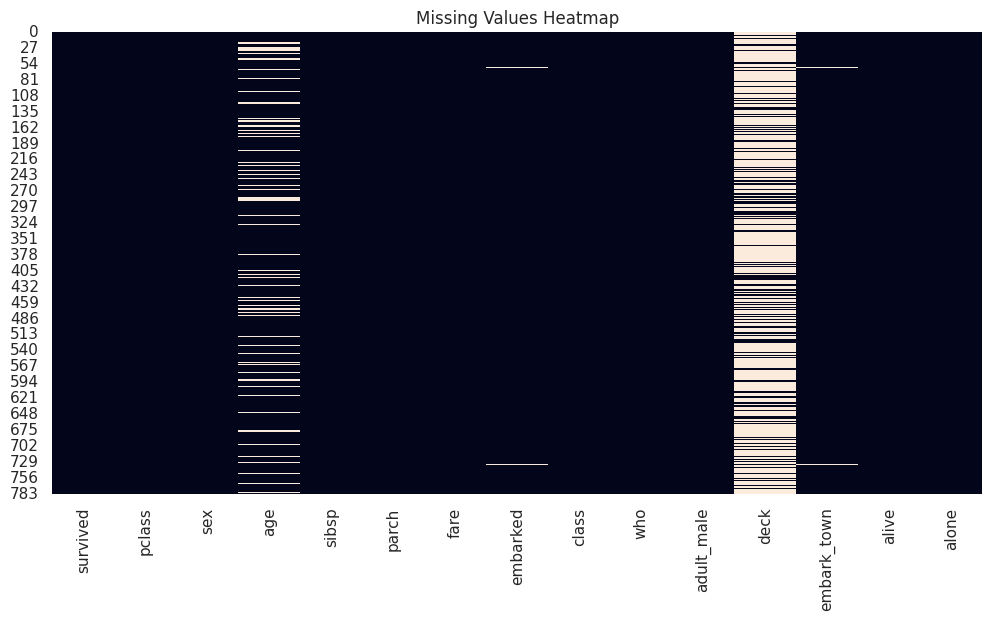

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False)
plt.title('Missing Values Heatmap')



5.2 Decide a missing data strategy

In [27]:
# Drop 'deck' due to too maany missing values
df = df.drop(columns=['deck'])

df.isna().sum().sort_values(ascending=False)

,0
age,106
embarked,2
embark_town,2
sex,0
pclass,0
survived,0
parch,0
sibsp,0
class,0
fare,0


In [28]:
# Impute 'age' with median
age_median = df['age'].median()
df['age'] = df['age'].fillna(age_median)

# Impute 'embarked_town' and 'embarked' with mode (most frequent value)
embarked_town_mode = df['embark_town'].mode()[0]
embarked_mode = df['embarked'].mode()[0]

df['embark_town'] = df['embark_town'].fillna(embarked_town_mode)
df['embarked'] = df['embarked'].fillna(embarked_mode)

# Check remaining missing values
df.isna().sum().sort_values(ascending=False)

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


6. Fixing data Type

In [ ]:
#current data types

In [30]:
df.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


In [32]:
# Convert object / String colums to 'category' where appropriate
categorical_cols = ['sex', 'class', 'embark_town', 'alive', 'who']

for col in categorical_cols:
    if col in df.columns:
      df[col] = df[col].astype('category')

df.dtypes

,0
survived,int64
pclass,int64
sex,category
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,category


7. Cleaning Categorical variables

In [33]:
#Example: Check unique values for some categorical colums
for col in ['sex', 'class', 'embarked', 'embark_town', 'alive']:
  print(f"\nColumn: {col}")
  print(df[col].unique())


Column: sex
['male', 'female']
Categories (2, object): ['female', 'male']

Column: class
['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

Column: embarked
['S' 'C' 'Q']

Column: embark_town
['Southampton', 'Cherbourg', 'Queenstown']
Categories (3, object): ['Cherbourg', 'Queenstown', 'Southampton']

Column: alive
['no', 'yes']
Categories (2, object): ['no', 'yes']
